# CSE 326/426 (Fall 2021)
## Linear regression

In [1]:
import numpy as np
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Create a simple dataset

In [2]:
X = []
y = []
a = 1.5
b = 0.6
X = np.arange(1,10,0.1)
y = X * 2 + 1 + 2 * np.random.randn(X.shape[0])

[1.91666793 1.44855629]


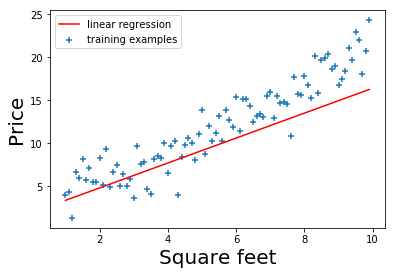

In [3]:
plt.scatter(X, y, marker='+', label='training examples')
plt.xlabel('Square feet', fontsize=20)
plt.ylabel('Price', fontsize=20)

z = np.polyfit(X, y, 1)
print (z)
plt.plot(X, z[1] * X+z[0], label='linear regression', color='red')
plt.legend()

## Plot some example hypotheses (linear functions)

No handles with labels found to put in legend.


/Users/bon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/bon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/bon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


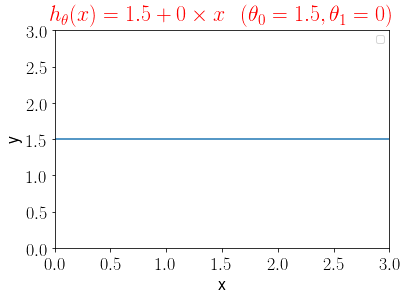

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
X = np.arange(0,10,0.1)
theta = [1.5, 0]
y = X * theta[1] + theta[0]
plt.plot(X, y)
plt.title(r'$h_{\theta}(x)=1.5 + 0 \times x \hspace{.2in}(\theta_0=1.5,\theta_1=0)$', fontsize=22, color='r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()

No handles with labels found to put in legend.


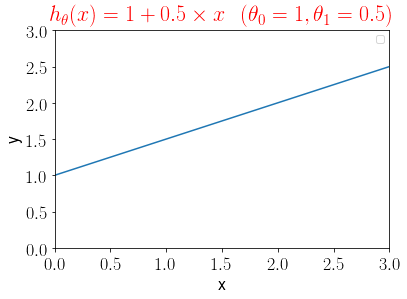

In [5]:
theta = [1, 0.5]
y = X * theta[1] + theta[0]
plt.plot(X, y)
plt.title(r'$h_{\theta}(x)=1+0.5 \times x \hspace{.2in}(\theta_0=1,\theta_1=0.5)$', fontsize=22, color='r')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim([0,3])
plt.ylim([0,3])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()

## Plot the MSE loss function with one parameter

Text(0.5, 0, '$\\theta_1$')

/Users/bon/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


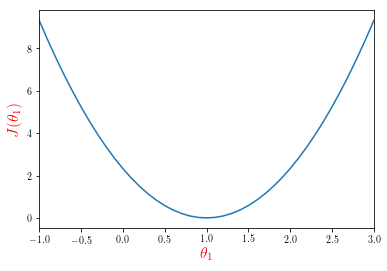

In [6]:
X = np.arange(-1,3.1,0.1)
y=(14/6)*(X-1)**2
plt.plot(X, y)
plt.xlim([-1,3])
plt.ylabel(r'$J(\theta_1)$', fontsize=16, color='red')
plt.xlabel(r'$\theta_1$', fontsize=16, color='red')
# plt.ylim([0,3])


## Plot the MSE loss function with two parameters

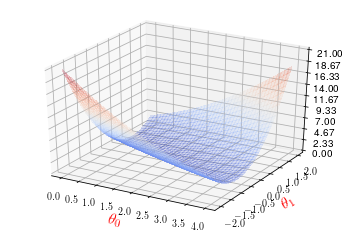

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

training_X = np.array([1,2,3])
training_y = np.array([1,2,3])

# Make data.
X = np.arange(0, 4, 0.025)
# print (X.shape)
Y = np.arange(-2, 2, 0.025)
X, Y = np.meshgrid(X, Y)
# print (X.shape)

Z = np.power(X + training_X[0] * Y - training_y[0],2)
for i in range(1,training_X.shape[0]):
    Z += np.power(X + training_X[i] * Y - training_y[i],2)
Z /= 6
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, label=r'$J(\theta_0, \theta_1)$', alpha=0.2)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel(r'$\theta_0$', fontsize=16, color='red')
ax.set_ylabel(r'$\theta_1$', fontsize=16, color='red')
# ax.set_zlabel(r'$J(\theta_0, \theta_1)$',  fontsize=16, color='red')
# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Contour plot
Contour plot are multiple lines in the space of parameters, so that one line represents the set of parameters that have the same loss function value.

In [ ]:
# print (Z)
fig, ax = plt.subplots(1,2)
CS = ax[0].contour(X, Y, Z, levels=np.arange(10,300,10))
ax[0].clabel(CS, inline=1, fontsize=10)
ax[0].set_title(r'Contour plot of $J(\theta_0, \theta_1)$', fontsize=16, color='red')
ax[0].set_xlabel(r'$\theta_0$', fontsize=16, color='red')
ax[0].set_ylabel(r'$\theta_1$', fontsize=16, color='red')

CS = ax[1].contour(X, Y, Z, levels=np.arange(10,30,7))
ax[1].clabel(CS, inline=1, fontsize=10)
ax[1].set_title(r'Contour plot of $J(\theta_0, \theta_1)$', fontsize=16, color='red')
ax[1].set_xlabel(r'$\theta_0$', fontsize=16, color='red')
ax[1].set_ylabel(r'$\theta_1$', fontsize=16, color='red')

## Demonstration of the gradient descent algorithm in just one parameter for linear regression.
### You can try different learning rate (alpha) and number of descent steps (N) to see the different effects.

In [ ]:

# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 0.1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum(
                                    (hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
# ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$', fontsize=20, color='red')
ax[1].set_ylabel(r'$J(\theta_1)$', fontsize=20, color='red')
ax[1].set_title('Cost function', fontsize=20, color='red')
ax[0].set_xlabel(r'$x$', fontsize=20, color='red')
ax[0].set_ylabel(r'$y$', fontsize=20, color='red')
ax[0].set_title('Data and fit', fontsize=20, color='red')
ax[0].legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

## Now apply gradient descent to both parameters. Plot the reduction in the loss function in a contour plot.

In [ ]:
# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$', fontsize=20, color='red')
ax[1].set_ylabel(r'$\theta_1$', fontsize=20, color='red')
ax[1].set_title('Cost function', fontsize=20, color='red')
ax[0].set_xlabel(r'$x$', fontsize=20, color='red')
ax[0].set_ylabel(r'$y$', fontsize=20, color='red')
ax[0].set_title('Data and fit', fontsize=20, color='red')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')

plt.show()